In [4]:
from sklearn.metrics import roc_auc_score
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
from tqdm import tqdm

def scale_data(data):
     return (data-np.min(data))/(np.max(data)-np.min(data))

class DataV0():
    """
    dataset = Dataset(data_type, df)

    img, y = dataset[i]
      img (np.float32): 2 x 360 x 128
      y (np.float32): label 0 or 1
    """
    def __init__(self, df, freq_tfms=False):
        self.df = df
        self.freq_tfms = freq_tfms
        

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        """
        i (int): get ith data
        """
        r = self.df.iloc[i]
        y = np.float32(r.target)
        try:
            print(y, r.pred)
        except:
            pass
        filename=r.id
        file_id = Path(r.id).stem
        img = np.empty((2, 360, 128), dtype=np.float32)
        with h5py.File(filename, 'r') as f:
            g = f[file_id]

            for ch, s in enumerate(['H1', 'L1']):
                a = g[s]['SFTs'][:, :4096] * 1e22  # Fourier coefficient complex64

                p = a.real**2 + a.imag**2  # power
                p /= np.mean(p)  # normalize
                p = np.mean(p.reshape(360, 128, 32), axis=2)  # compress 4096 -> 128
                #print(p.min(), p.max())
                #p = scale_data(p)
                img[ch] = p
        if self.freq_tfms:
            if np.random.rand()>0.5:
                img = self.freq_tfms(img)

        return img, y.astype('int')

In [5]:
def read_file(fn):
    df=  pd.read_csv(fn)
    df['data_folder'] = df['id_csv'].apply(lambda x: Path(x).parent.parent.stem)
    return df

0.8354166666666667


<AxesSubplot:ylabel='Frequency'>

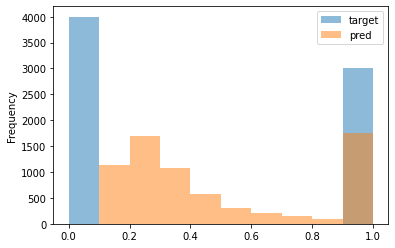

In [6]:
EXP_20_00 = read_file(
    "EXP_20_03_PSD/EXP_20_DATA_V10_V11_V12_NEG_13_14_16_17_360_128_V_16_large_PSD_0_4_oof.csv"
)
print(roc_auc_score(EXP_20_00["target"], EXP_20_00["pred"]))
EXP_20_00[["target", "pred"]].plot.hist(alpha=0.5)

In [7]:
#EXP_20_00_MIXUP = read_file(
#    "EXP_20_03/EXP_20_DATA_V10_V11_V12_NEG_13_14_16_17_360_128_V_16_large_0_4_oof.csv"
#)
#print(roc_auc_score(EXP_20_00_MIXUP["target"], EXP_20_00_MIXUP["pred"]))
#EXP_20_00_MIXUP[["target", "pred"]].plot.hist(alpha=0.5)

In [42]:
#EXP_20_00_MIXUP['pred'] = (EXP_20_00['pred'].rank(pct=True) + EXP_20_00_MIXUP['pred'].rank(pct=True))/2

In [8]:
#EXP_20_00_MIXUP['pred']

In [43]:
roc_auc_score(EXP_20_00_MIXUP.query('snr<50')['target'], EXP_20_00_MIXUP.query('snr<50')['pred'])

0.6847370833333333

<AxesSubplot:ylabel='Frequency'>

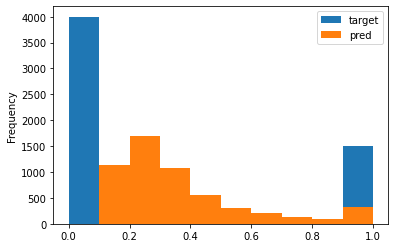

In [9]:
EXP_20_00.query('snr<50')[['target', 'pred']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

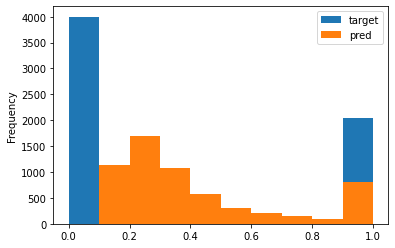

In [10]:
EXP_20_00.query('snr<60')[['target', 'pred']].plot.hist()

In [ ]:
exp_10_07

In [ ]:
#dataset =  DataV0(df.query("snr>0").query('data_folder=="DATA_V12"').reset_index(drop=True))
dataset = DataV0(exp_10_07.query("target==1").query('snr>40 & pred<0.8').reset_index(drop=True))
for i in range(100):
    img, y = dataset[np.random.randint(0, len(dataset))]
    #img, y = dataset[i]
    plt.figure(figsize=(8, 8))
    plt.title('Spectrogram')
    plt.xlabel('time')
    plt.ylabel('frequency')
    plt.imshow(np.concatenate([img[0], img[1]], 1))  # zooming in for dataset[10]
    plt.colorbar()
    plt.show()
    print(y)
    plt.pause(0.1)

    

In [ ]:
#submit = pd.read_csv('../data/sample_submission.csv')
#submit.columns = ['fn', 'target']
#submit['fn'] = submit['fn'].apply(lambda x: Path('../data/test')/f'{x}.hdf5')
#submit.columns = ['id', 'target']

In [ ]:
##dataset =  DataV0(df.query("snr>0").query('data_folder=="DATA_V12"').reset_index(drop=True))
#min_values = []
#max_values = []
#mean_values = []
#ds = DataV0(submit)
#for i in tqdm(range(len(ds))):
#    x = ds[i][0]
#    min_values.append(x.min())
#    max_values.append(x.max())
#    mean_values.append(x.mean())

In [ ]:
x.min()

In [ ]:
x.max()